In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
from scipy.ndimage import gaussian_filter1d, prewitt


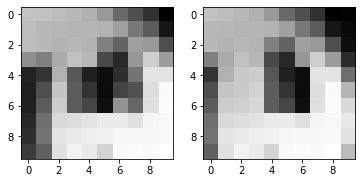

In [3]:
# Load 2 example images
Im1 = imageio.imread("optical_flow_data/composedIm_1.png")
Im2 = imageio.imread("optical_flow_data/composedIm_2.png")

fig, ax = plt.subplots(1, 2)
ax[0].imshow(Im1, cmap='gray')
ax[1].imshow(Im2, cmap='gray')
plt.show()

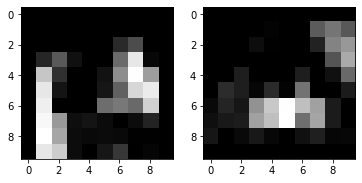

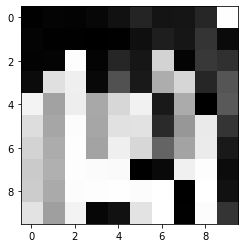

In [34]:
# Obtain the spacial derivatives
filter_x = np.array([[-1, 0, 1]])
filter_y = np.array([[-1], [0], [1]])

Im1_x = cv2.filter2D(Im1, cv2.CV_8U, filter_x)
Im1_y = cv2.filter2D(Im1, cv2.CV_8U, filter_y)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Im1_x, cmap='gray')
ax[1].imshow(Im1_y, cmap='gray')
plt.show()

# Obtain the time derivative
Im_t = Im1 - Im2
plt.imshow(Im_t, cmap='gray')
plt.show()



In [35]:
row, col = (5, 4)
# Obtain the matrices A and b
A = np.zeros((9, 2))
b = np.zeros(9)
k = 0
for i in range(-1, 2):
    for j in range(-1, 2):
        A[k, 0] = Im1_x[col - 1 + j, row - 1 + i]
        A[k, 1] = Im1_y[col - 1 + j, row - 1 + i]
        b[k] = Im_t[col - 1 + j, row - 1 + i]
        k += 1

print(A)
print(b)

# Obtain the optical flow in the given pixel
ATA_inv = np.linalg.inv(np.matmul(A.T, A))
ATb = np.matmul(A.T, b)
u = np.matmul(ATA_inv, ATb)
print(u)



[[ 0.  9.]
 [ 9.  0.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [10.  0.]]
[  4.   8. 168.  38.  82. 215.  22.  25. 241.]
[13.71270718  0.90243902]


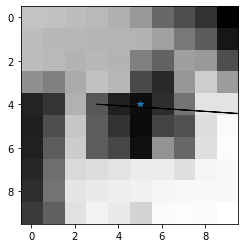

In [36]:
x_vals = [col - 1, col - 1 + u[0]]
y_vals = [row - 1, row - 1 + u[1]]
plt.arrow(col - 1, row - 1, u[0], u[1])
plt.plot(5, 4, '*')
plt.imshow(Im1, cmap='gray')
plt.show()